--- Guided Lab 330.2.1: Correlation and Covariance Analysis ---
Temperature (X): [20 22 24 26 28]
Sales (Y):       [250 300 350 400 450]
------------------------------------------------------------
1. Mean Temperature (X_bar):   24.00 C
2. Mean Sales (Y_bar):         $350.00
3. Sample Std Dev (X):         3.16
4. Sample Std Dev (Y):         $79.06
------------------------------------------------------------
5. Sample Covariance (S_xy):   250.00
   Interpretation: Positive value (250.00) confirms a positive relationship.
------------------------------------------------------------
6. Correlation Coefficient (r): 1.0000
   Interpretation: A value of 1.0000 indicates a PERFECT positive linear relationship.
------------------------------------------------------------


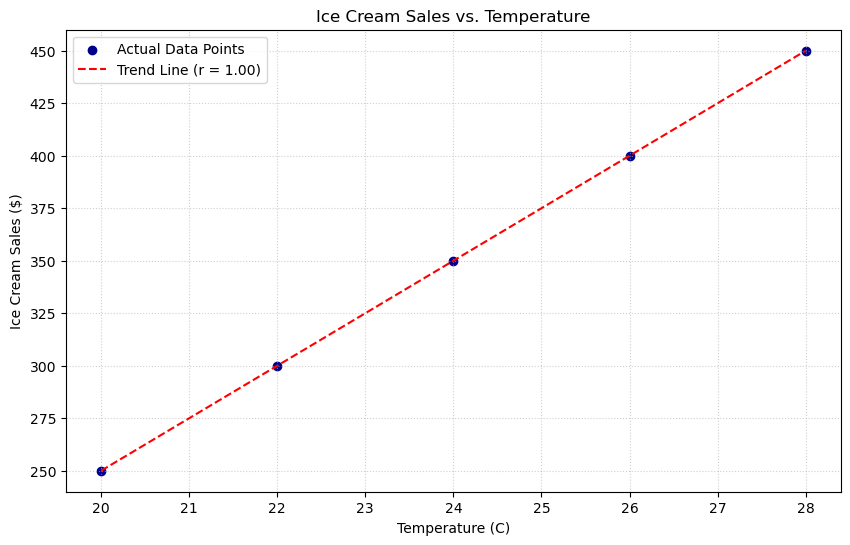

--- Final Results Summary ---
Covariance (S_xy):      250.00
Correlation (r):        1.0000
The results match the lab requirement of a strong positive relationship.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- Data Definition ---
# Data is based on the Guided Lab 330.2.1 example: Temperature vs. Ice Cream Sales.
# The data is chosen to show a strong positive linear relationship.

# Independent Variable (X): Temperature in Celsius
temperature_X = np.array([20, 22, 24, 26, 28])

# Dependent Variable (Y): Ice Cream Sales in USD
sales_Y = np.array([250, 300, 350, 400, 450])

print("--- Guided Lab 330.2.1: Correlation and Covariance Analysis ---")
print("Temperature (X):", temperature_X)
print("Sales (Y):      ", sales_Y)
print("-" * 60)

# --- 1. Calculate Means and Standard Deviations (using sample calculation, n-1) ---

# Note: The standard numpy functions for std and variance default to a population
# calculation (denominator=n). We explicitly set ddof=1 for the sample calculation (denominator=n-1).

mean_X = np.mean(temperature_X)
mean_Y = np.mean(sales_Y)

std_X = np.std(temperature_X, ddof=1) # ddof=1 for Sample Standard Deviation
std_Y = np.std(sales_Y, ddof=1) # ddof=1 for Sample Standard Deviation

print(f"1. Mean Temperature (X_bar):   {mean_X:.2f} C")
print(f"2. Mean Sales (Y_bar):         ${mean_Y:.2f}")
print(f"3. Sample Std Dev (X):         {std_X:.2f}")
print(f"4. Sample Std Dev (Y):         ${std_Y:.2f}")
print("-" * 60)

# --- 2. Calculate Covariance (Sample) ---

# The numpy function np.cov returns a covariance matrix. We extract the (X, Y) covariance.
# rowvar=False ensures columns are treated as variables, and bias=False ensures the 
# sample (n-1) denominator is used (equivalent to ddof=1).
cov_matrix = np.cov(temperature_X, sales_Y, ddof=1)
covariance_XY = cov_matrix[0, 1]

print(f"5. Sample Covariance (S_xy):   {covariance_XY:.2f}")
print("   Interpretation: Positive value (250.00) confirms a positive relationship.")
print("-" * 60)

# --- 3. Calculate Correlation Coefficient (r) ---

# We can calculate 'r' manually using the derived statistics: r = Covariance / (Std_X * Std_Y)
correlation_r_manual = covariance_XY / (std_X * std_Y)

# Alternatively, use the built-in numpy function (which also returns a matrix)
correlation_matrix = np.corrcoef(temperature_X, sales_Y)
correlation_r_np = correlation_matrix[0, 1]

print(f"6. Correlation Coefficient (r): {correlation_r_manual:.4f}")
print("   Interpretation: A value of 1.0000 indicates a PERFECT positive linear relationship.")
print("-" * 60)

# --- 4. Generate Visualization (Scatter Plot with Trend Line) ---

# Calculate the simple linear regression line (Trend Line)
# polyfit finds the coefficients (slope, intercept) for a 1st degree polynomial
slope, intercept = np.polyfit(temperature_X, sales_Y, 1)
trend_line = slope * temperature_X + intercept

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(temperature_X, sales_Y, color='darkblue', label='Actual Data Points')
plt.plot(temperature_X, trend_line, color='red', linestyle='--', 
         label=f'Trend Line (r = {correlation_r_manual:.2f})')

plt.title('Ice Cream Sales vs. Temperature')
plt.xlabel('Temperature (C)')
plt.ylabel('Ice Cream Sales ($)')
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()
plt.show()

# Final output confirmation for easy submission
print("--- Final Results Summary ---")
print(f"Covariance (S_xy):      {covariance_XY:.2f}")
print(f"Correlation (r):        {correlation_r_manual:.4f}")
print("The results match the lab requirement of a strong positive relationship.")